### Step 1 Loading the Dataset and Viewing the Data

In [1]:
import pandas as pd
import numpy as np

# Load dataset
file_path = 'Bird_Migration_Data_with_Origin.csv'  # Change if different
df = pd.read_csv(file_path)

# Display first 5 rows
print("🔹 First 5 rows:")
print(df.head())

# Basic info
print("\n🔹 Dataset Info:")
df.info()

# Check for missing values
print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Summary statistics
print("\n🔹 Summary Stats:")
print(df.describe(include='all').T)


🔹 First 5 rows:
  Bird_ID  Species         Region    Habitat Weather_Condition  \
0   B1000  Warbler  South America  Grassland            Stormy   
1   B1001    Stork  North America  Grassland            Stormy   
2   B1002     Hawk  South America   Mountain            Stormy   
3   B1003  Warbler  South America      Urban            Stormy   
4   B1004    Crane         Europe      Urban             Windy   

  Migration_Reason  Start_Latitude  Start_Longitude  End_Latitude  \
0          Feeding       11.906566      -169.378251     30.377647   
1         Breeding       62.301546      -111.475069     39.921092   
2  Avoid Predators       87.861164       -78.727327     66.990980   
3   Climate Change       35.770590       153.104341    -49.003145   
4  Avoid Predators      -21.611614       106.674824     11.681051   

   End_Longitude  ...  Migration_Interrupted  Interrupted_Reason  \
0     -21.366879  ...                    Yes               Storm   
1      47.963436  ...               

### Step 2 Data Cleaning

In [2]:
# 1. Check missing values
print("\n🔍 Missing values per column:")
print(df.isnull().sum().sort_values(ascending=False))


🔍 Missing values per column:
Interrupted_Reason         1981
Bird_ID                       0
Tracking_Quality              0
Migration_Start_Month         0
Migration_End_Month           0
Rest_Stops                    0
Predator_Sightings            0
Tag_Type                      0
Migrated_in_Flock             0
Flock_Size                    0
Food_Supply_Level             0
Migration_Interrupted         0
Species                       0
Tagged_By                     0
Tag_Weight_g                  0
Migration_Success             0
Recovery_Location_Known       0
Recovery_Time_days            0
Observation_Counts            0
Observation_Quality           0
Signal_Strength_dB            0
Tag_Battery_Level_%           0
Nesting_Success               0
Visibility_km                 0
Region                        0
Habitat                       0
Weather_Condition             0
Migration_Reason              0
Start_Latitude                0
Start_Longitude               0
End_Latitu

In [3]:
# 1. Show all unique reasons and their counts (including NaNs)
print("🔹 Interrupted_Reason value counts (including NaNs):")
print(df['Interrupted_Reason'].value_counts(dropna=False))

# 2. Show just the non-null reasons sorted by frequency
print("\n🔹 Non-null Interrupted_Reason counts:")
print(df['Interrupted_Reason'].value_counts())

🔹 Interrupted_Reason value counts (including NaNs):
Interrupted_Reason
Storm          2059
Injury         2023
Predator       1994
NaN            1981
Lost Signal    1943
Name: count, dtype: int64

🔹 Non-null Interrupted_Reason counts:
Interrupted_Reason
Storm          2059
Injury         2023
Predator       1994
Lost Signal    1943
Name: count, dtype: int64


In [4]:
# Replace missing Interrupted_Reason values with "Unknown"
df['Interrupted_Reason'] = df['Interrupted_Reason'].fillna('Unknown')

# 1. Check missing values
print("\n🔍 Missing values per column:")
print(df.isnull().sum().sort_values(ascending=False))
# 2. Show just the non-null reasons sorted by frequency
print("\n🔹 Non-null Interrupted_Reason counts:")
print(df['Interrupted_Reason'].value_counts())



🔍 Missing values per column:
Bird_ID                    0
Tracking_Quality           0
Migration_Start_Month      0
Migration_End_Month        0
Rest_Stops                 0
Predator_Sightings         0
Tag_Type                   0
Migrated_in_Flock          0
Flock_Size                 0
Food_Supply_Level          0
Migration_Interrupted      0
Species                    0
Interrupted_Reason         0
Tagged_By                  0
Tag_Weight_g               0
Migration_Success          0
Recovery_Location_Known    0
Recovery_Time_days         0
Observation_Counts         0
Observation_Quality        0
Signal_Strength_dB         0
Tag_Battery_Level_%        0
Nesting_Success            0
Visibility_km              0
Region                     0
Habitat                    0
Weather_Condition          0
Migration_Reason           0
Start_Latitude             0
Start_Longitude            0
End_Latitude               0
End_Longitude              0
Flight_Distance_km         0
Flight_Durati

In [5]:
# 3. Convert categorical columns to 'category' dtype
categorical_cols = [
    'Species', 'Region', 'Habitat', 'Weather_Condition',
    'Migration_Reason', 'Migration_Start_Month', 'Migration_End_Month',
    'Nesting_Success', 'Tag_Type', 'Migrated_in_Flock',
    'Tracking_Quality', 'Migration_Interrupted', 'Migration_Success',
    'Recovery_Location_Known'
]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# 4. Convert Migration_Start_Month and Migration_End_Month to ordered category
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month_col in ['Migration_Start_Month', 'Migration_End_Month']:
    if month_col in df.columns:
        df[month_col] = pd.Categorical(df[month_col], categories=month_order, ordered=True)

# 5. Show data types after conversion
print("\n✅ Updated column types:")
print(df.dtypes)



✅ Updated column types:
Bird_ID                      object
Species                    category
Region                     category
Habitat                    category
Weather_Condition          category
Migration_Reason           category
Start_Latitude              float64
Start_Longitude             float64
End_Latitude                float64
End_Longitude               float64
Flight_Distance_km          float64
Flight_Duration_hours       float64
Average_Speed_kmph          float64
Max_Altitude_m                int64
Min_Altitude_m                int64
Temperature_C               float64
Wind_Speed_kmph             float64
Humidity_%                    int64
Pressure_hPa                float64
Visibility_km               float64
Nesting_Success            category
Tag_Battery_Level_%           int64
Signal_Strength_dB          float64
Migration_Start_Month      category
Migration_End_Month        category
Rest_Stops                    int64
Predator_Sightings            int64
Tag

### Step 3.1 Univaritate Analysis

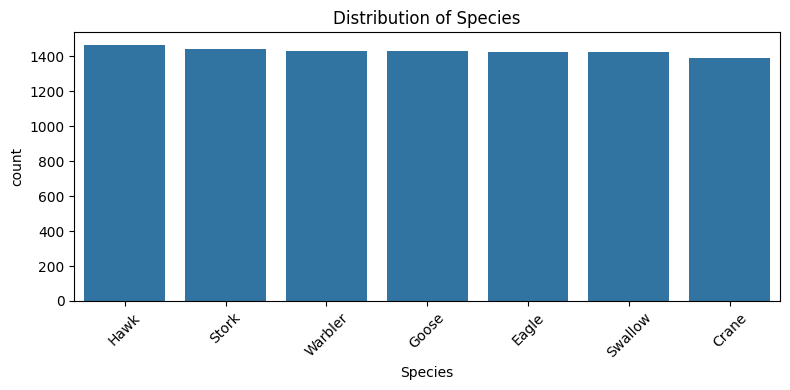

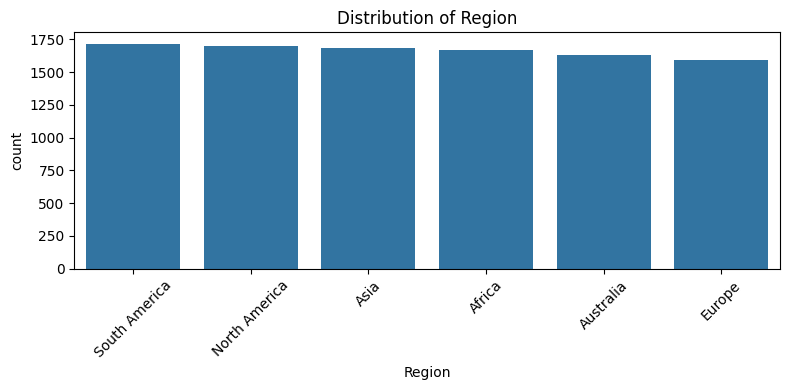

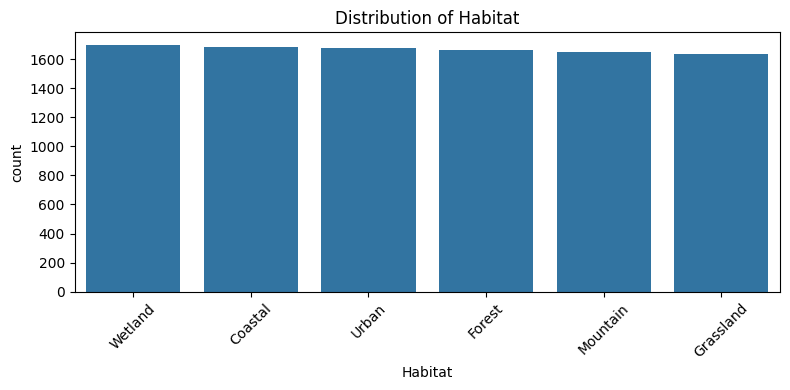

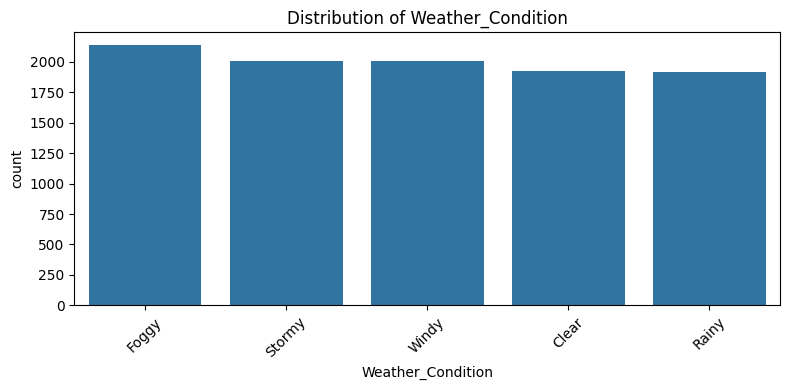

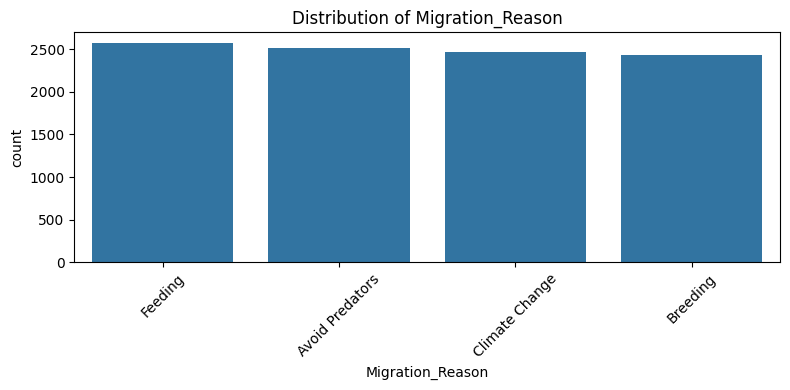

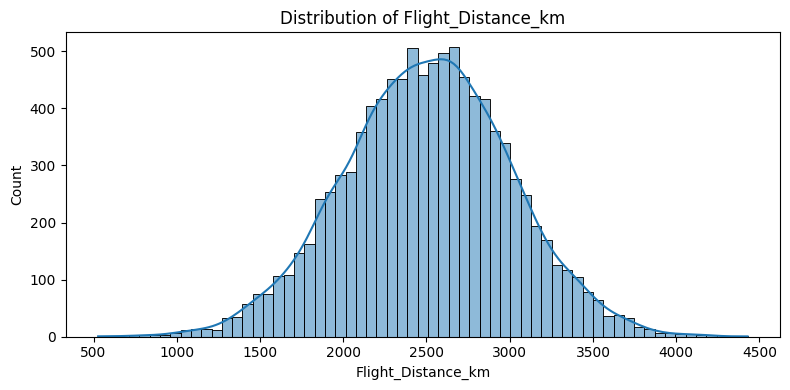

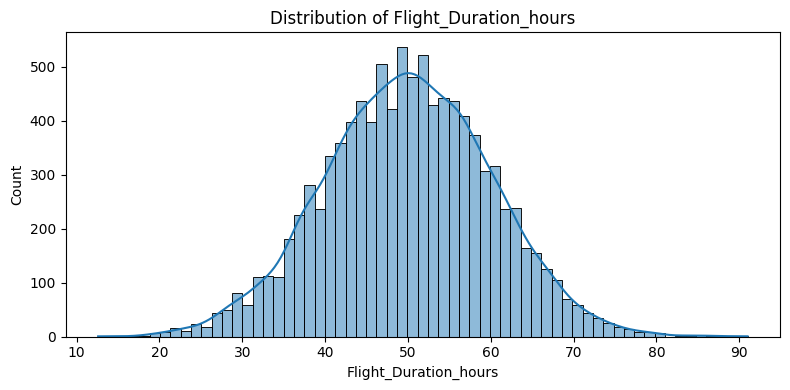

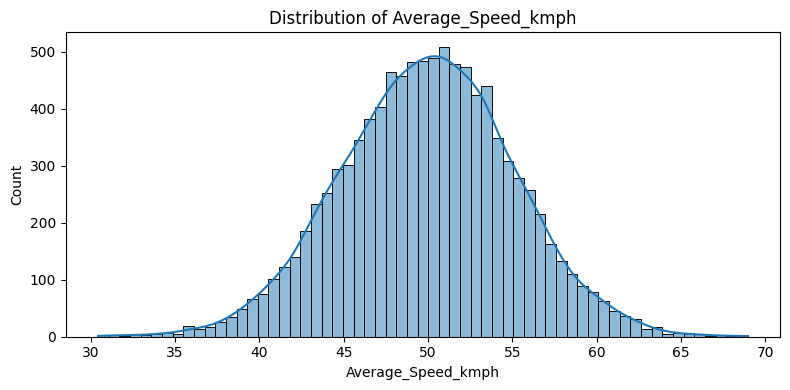

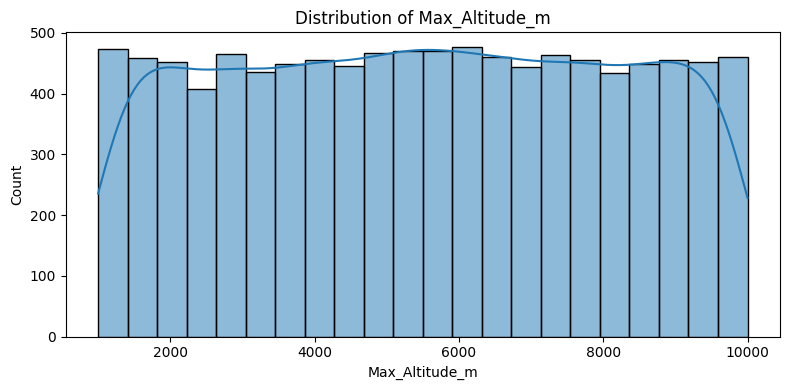

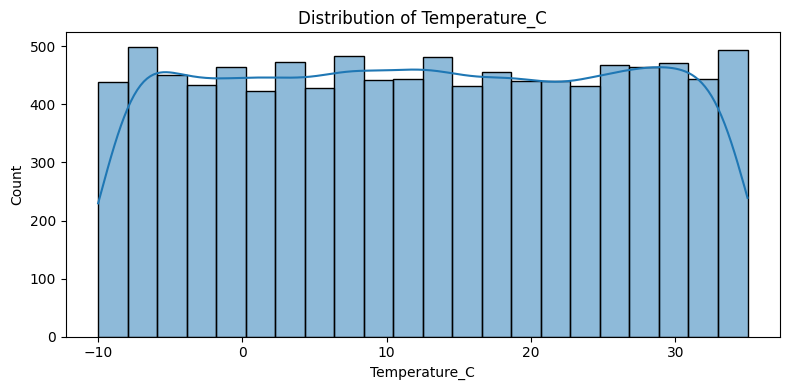

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3.1.1 Categorical feature distributions
cat_cols = ['Species', 'Region', 'Habitat', 'Weather_Condition', 'Migration_Reason']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, 
                  order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3.1.2 Numerical feature distributions
num_cols = ['Flight_Distance_km', 'Flight_Duration_hours', 
            'Average_Speed_kmph', 'Max_Altitude_m', 'Temperature_C']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


### Step 3.2 Bivariate Analysis

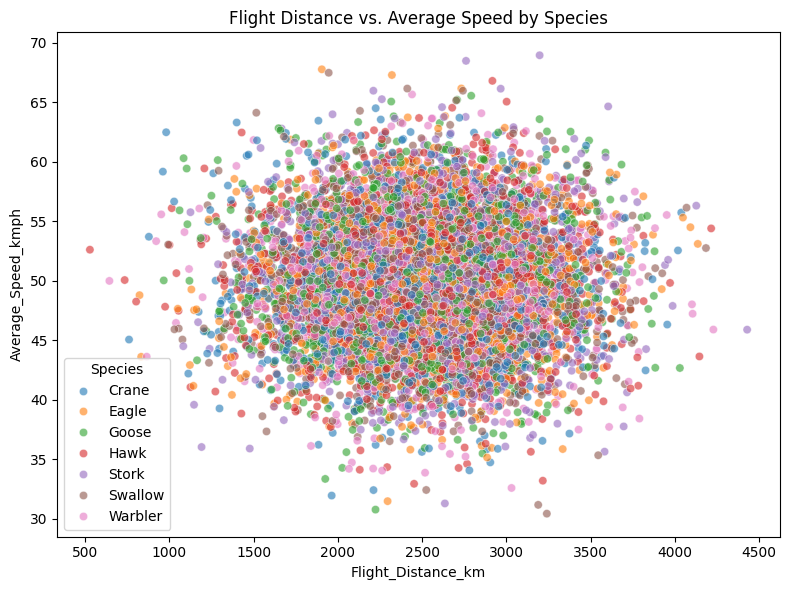

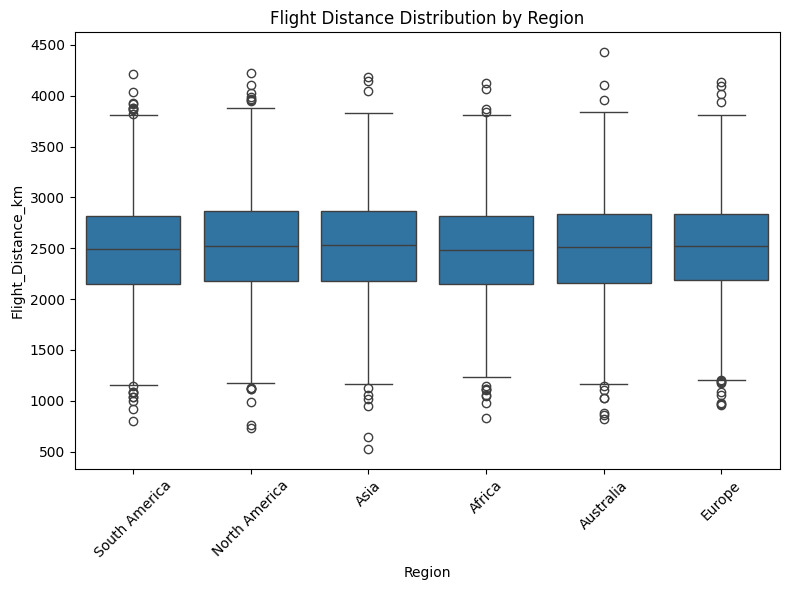

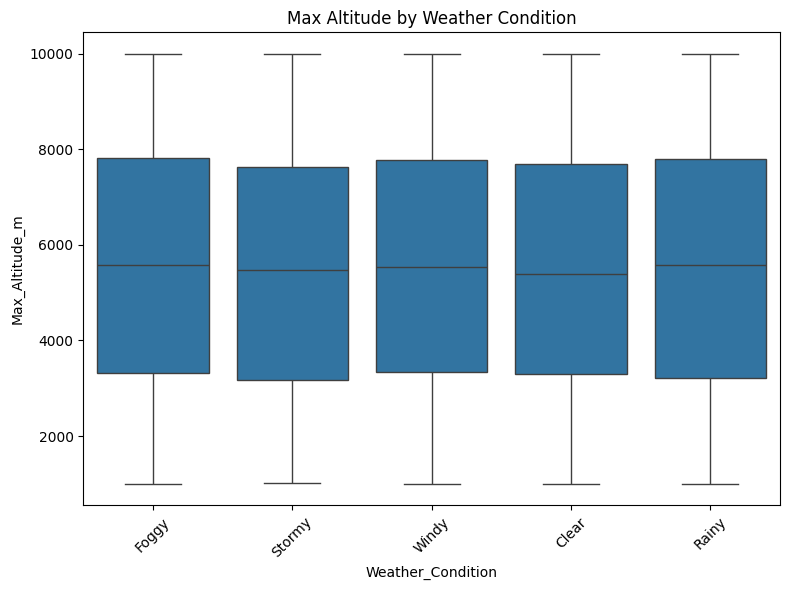

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Flight Distance vs. Average Speed (scatterplot, colored by Species)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Flight_Distance_km',
    y='Average_Speed_kmph',
    hue='Species',
    alpha=0.6
)
plt.title('Flight Distance vs. Average Speed by Species')
plt.tight_layout()
plt.show()

# 2. Boxplot of Flight Distance by Region
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Region',
    y='Flight_Distance_km',
    order=df['Region'].value_counts().index
)
plt.title('Flight Distance Distribution by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Boxplot of Max Altitude by Weather Condition
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Weather_Condition',
    y='Max_Altitude_m',
    order=df['Weather_Condition'].value_counts().index
)
plt.title('Max Altitude by Weather Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Step 4 Geospatial Mapping

In [8]:
import plotly.express as px

# Sample a subset for performance (e.g., 500 birds)
df_map = df.sample(500, random_state=42)

# Build a DataFrame of “segments” for each bird
segments = []
for _, row in df_map.iterrows():
    segments.append({
        'Bird_ID': row['Bird_ID'],
        'Species': row['Species'],
        'lat_start': row['Start_Latitude'],
        'lon_start': row['Start_Longitude'],
        'lat_end': row['End_Latitude'],
        'lon_end': row['End_Longitude'],
    })
seg_df = pd.DataFrame(segments)

# Melt into long format for px.line_geo
long_df = pd.wide_to_long(
    seg_df.reset_index(),
    stubnames=['lat', 'lon'],
    i=['index','Bird_ID','Species'],
    j='point',
    sep='_',
    suffix='start|end'
).reset_index()

fig = px.line_geo(
    long_df,
    lat='lat',
    lon='lon',
    color='Species',
    line_group='Bird_ID',
    projection='natural earth',
    title='Migration Routes (Sample of 500 Birds)'
)
fig.update_layout(legend=dict(title='Species'))
fig.show()


### Step 5 Multivariate Analysis

5.1 Correlation Heat Map

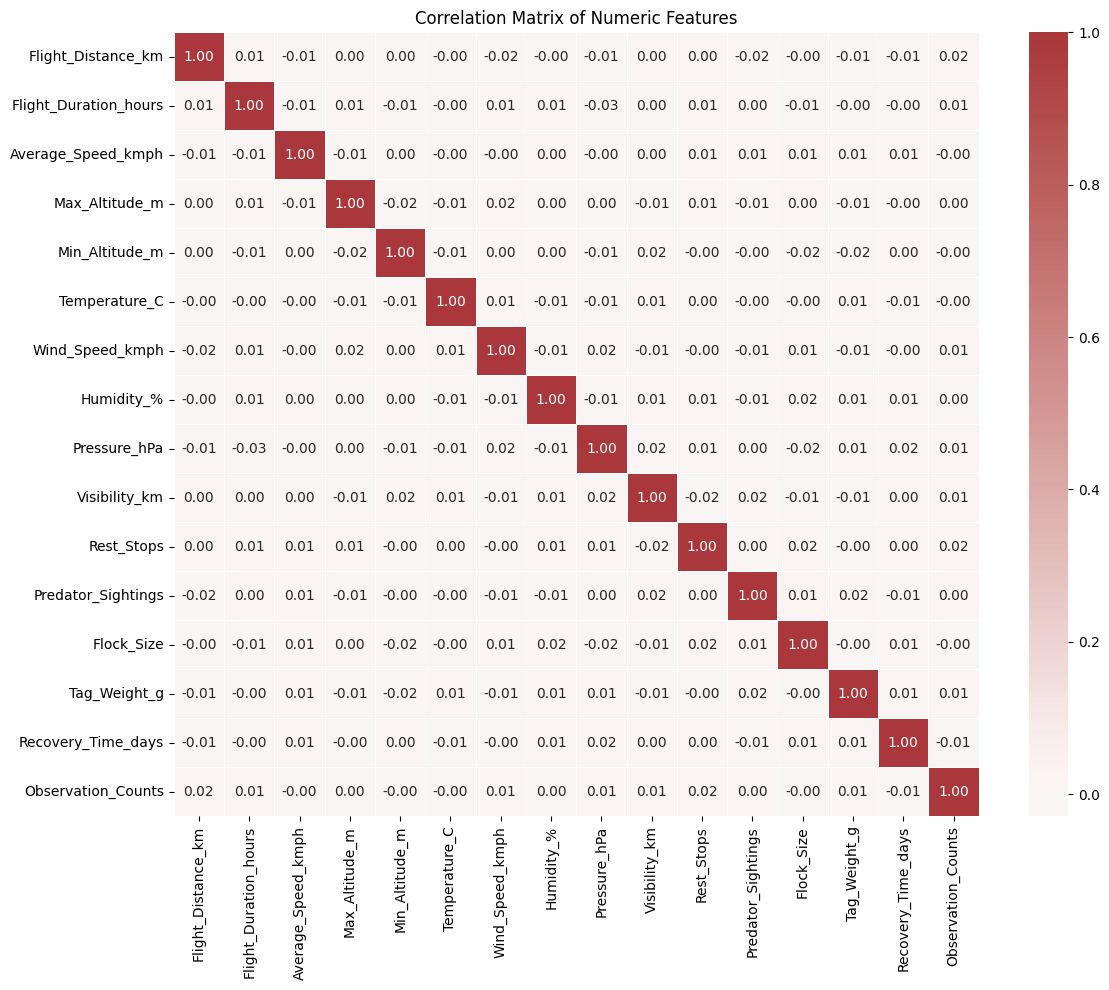

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
num_cols = [
    'Flight_Distance_km', 'Flight_Duration_hours', 'Average_Speed_kmph',
    'Max_Altitude_m', 'Min_Altitude_m', 'Temperature_C', 'Wind_Speed_kmph',
    'Humidity_%', 'Pressure_hPa', 'Visibility_km', 'Rest_Stops',
    'Predator_Sightings', 'Flock_Size', 'Tag_Weight_g',
    'Recovery_Time_days', 'Observation_Counts'
]

# Compute correlation matrix
corr = df[num_cols].corr()

# Plot
plt.figure(figsize=(12,10))
sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f", 
    cmap='vlag', 
    center=0, 
    linewidths=0.5
)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


5.2 Pairplot for Key Variables

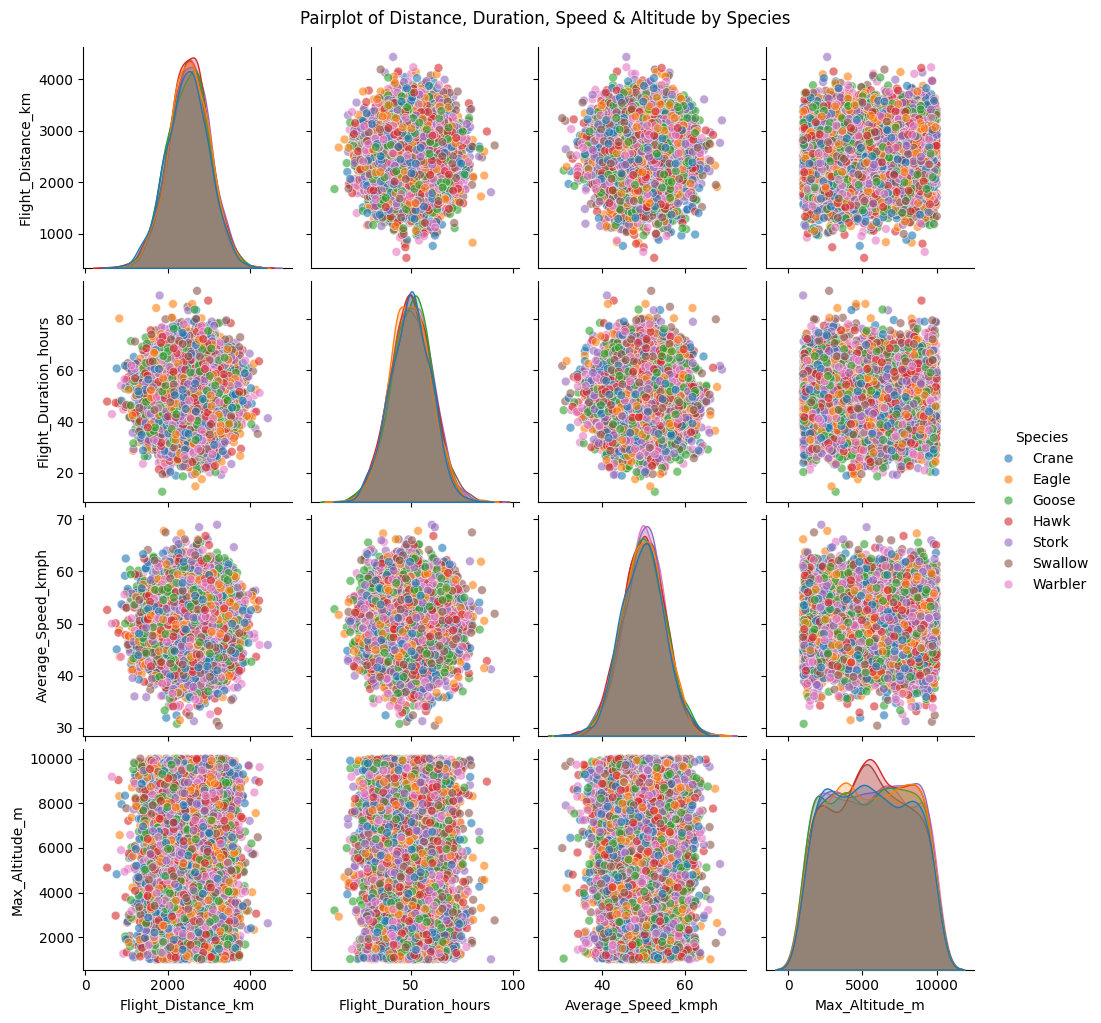

In [10]:
subset = ['Flight_Distance_km', 'Flight_Duration_hours', 'Average_Speed_kmph', 'Max_Altitude_m', 'Species']
sns.pairplot(
    df[subset], 
    hue='Species', 
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 40}
)
plt.suptitle('Pairplot of Distance, Duration, Speed & Altitude by Species', y=1.02)
plt.show()


5.3 Categorical vs. Numeric: Violin Plots

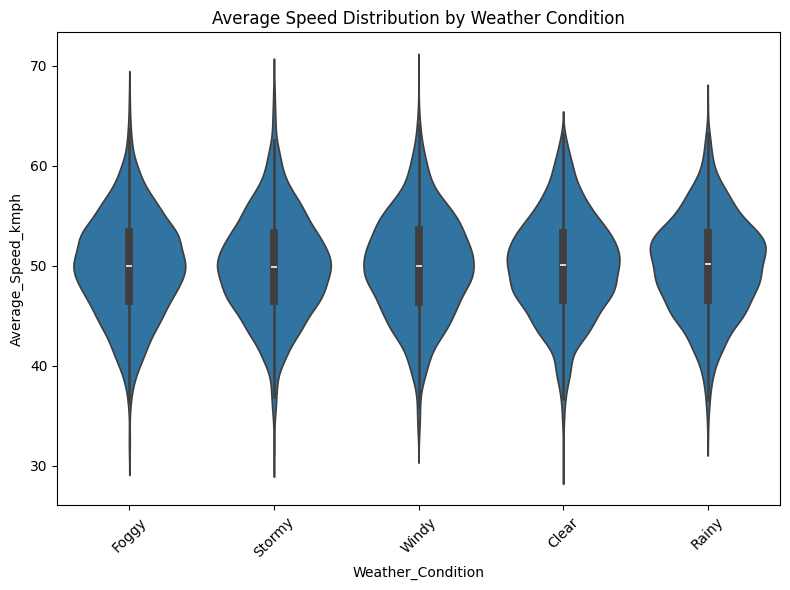

In [11]:
plt.figure(figsize=(8,6))
sns.violinplot(
    data=df, 
    x='Weather_Condition', 
    y='Average_Speed_kmph',
    order=df['Weather_Condition'].value_counts().index
)
plt.title('Average Speed Distribution by Weather Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Step 6 Dimensionality Reduction & Clustering

Use PCA to reduce to 2 components for visualization, then apply K-Means to find clusters of migration behavior.

Explained variance by PC: [0.06612664 0.06548791]


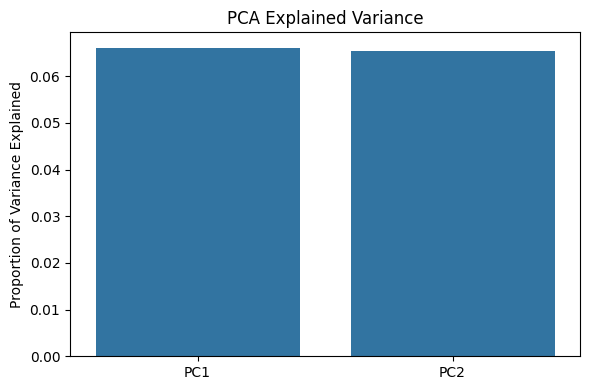

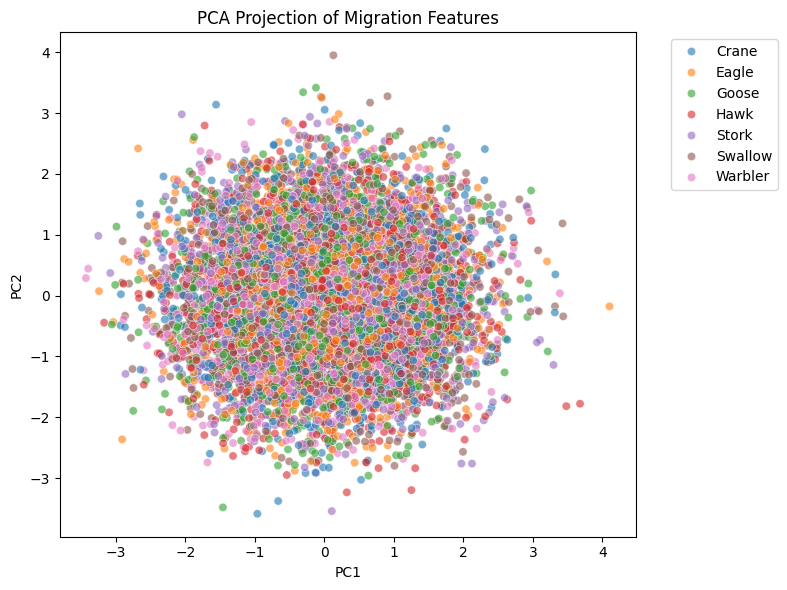

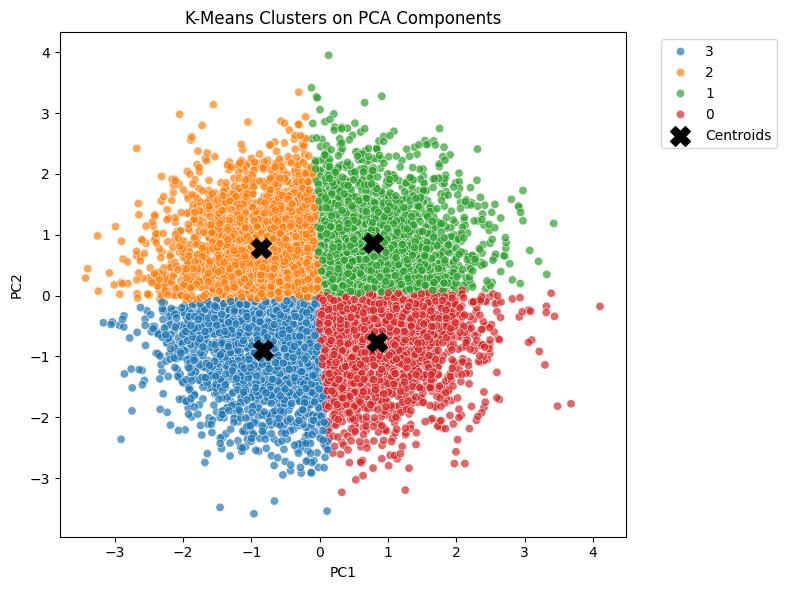

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 6.1 Prepare numeric data for PCA
features = [
    'Flight_Distance_km', 'Flight_Duration_hours', 'Average_Speed_kmph',
    'Max_Altitude_m', 'Min_Altitude_m', 'Temperature_C', 'Wind_Speed_kmph',
    'Humidity_%', 'Pressure_hPa', 'Visibility_km',
    'Rest_Stops', 'Predator_Sightings', 'Flock_Size',
    'Tag_Weight_g', 'Recovery_Time_days', 'Observation_Counts'
]
X = df[features].copy()

# 6.2 Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6.3 PCA to 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Species'] = df['Species'].values

# 6.4 Plot explained variance
print("Explained variance by PC:", pca.explained_variance_ratio_)
plt.figure(figsize=(6,4))
sns.barplot(x=['PC1','PC2'], y=pca.explained_variance_ratio_)
plt.ylabel('Proportion of Variance Explained')
plt.title('PCA Explained Variance')
plt.tight_layout()
plt.show()

# 6.5 Scatter of PCA colored by Species
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_pca, x='PC1', y='PC2',
    hue='Species', alpha=0.6
)
plt.title('PCA Projection of Migration Features')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

# 6.6 K-Means clustering on PCA space
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_pca[['PC1','PC2']])
df_pca['Cluster'] = clusters.astype(str)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_pca, x='PC1', y='PC2',
    hue='Cluster', palette='tab10', alpha=0.7
)
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    s=200, c='black', marker='X', label='Centroids'
)
plt.title('K-Means Clusters on PCA Components')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


Identify which original features drive PC1 and PC2.

In [13]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=features,
    columns=['PC1','PC2']
)
display(loadings.sort_values('PC1', ascending=False).head(5))
display(loadings.sort_values('PC2', ascending=False).head(5))


,PC1,PC2
Flight_Duration_hours,0.393975,-0.045227
Flight_Distance_km,0.325225,0.140130
Max_Altitude_m,0.243360,-0.392296
Rest_Stops,0.054254,-0.356896
Humidity_%,0.049874,0.114215


,PC1,PC2
Temperature_C,-0.038293,0.341870
Min_Altitude_m,0.047465,0.335268
Visibility_km,-0.183825,0.322003
Flight_Distance_km,0.325225,0.140130
Humidity_%,0.049874,0.114215


Cluster Profiling

In [14]:
df['Cluster'] = clusters
cluster_summary = df.groupby('Cluster')[features].mean().round(2)
display(cluster_summary)


,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,Max_Altitude_m,Min_Altitude_m,Temperature_C,Wind_Speed_kmph,Humidity_%,Pressure_hPa,Visibility_km,Rest_Stops,Predator_Sightings,Flock_Size,Tag_Weight_g,Recovery_Time_days,Observation_Counts
Cluster,,,,,,,,,,,,,,,,
0,2595.47,53.71,48.89,6797.35,445.49,9.00,32.29,52.75,989.14,8.37,8.68,3.80,298.66,15.70,54.91,49.54
1,2678.38,52.57,49.06,5121.10,577.21,15.97,25.70,58.00,986.62,11.31,6.29,4.03,182.81,16.10,43.46,47.99
2,2427.67,46.40,50.82,4172.19,549.25,16.25,28.56,55.23,1011.99,12.94,6.08,5.18,197.98,19.77,66.74,50.76
3,2304.04,47.12,51.12,5934.80,425.86,8.92,35.09,50.77,1014.79,9.91,8.52,4.98,318.04,18.93,77.68,51.26


* PC1 is dominated by flight duration, flight distance, and (to a lesser extent) altitude. A bird with a high PC1 score tends to fly long distances for long durations.

* PC2 is driven positively by temperature, minimum altitude, and visibility, and negatively by max altitude and rest stops. A high PC2 score suggests migrations in warmer, clearer conditions, at moderate altitudes, with fewer stops.

* Cluster 0: Long, high-altitude flights; moderate stops and predator encounters.

* Cluster 1: Longest migrations with the most stops but fewer predator sightings.

* Cluster 2: Shortest and quickest migrations with the largest flocks and most rest stops—perhaps social “convoy” migrations.

* Cluster 3: Mid-range distance, highest average speed, and moderate altitude—maybe opportunistic flyers.

### Step 7 Seasonal / Time-Based Analysis

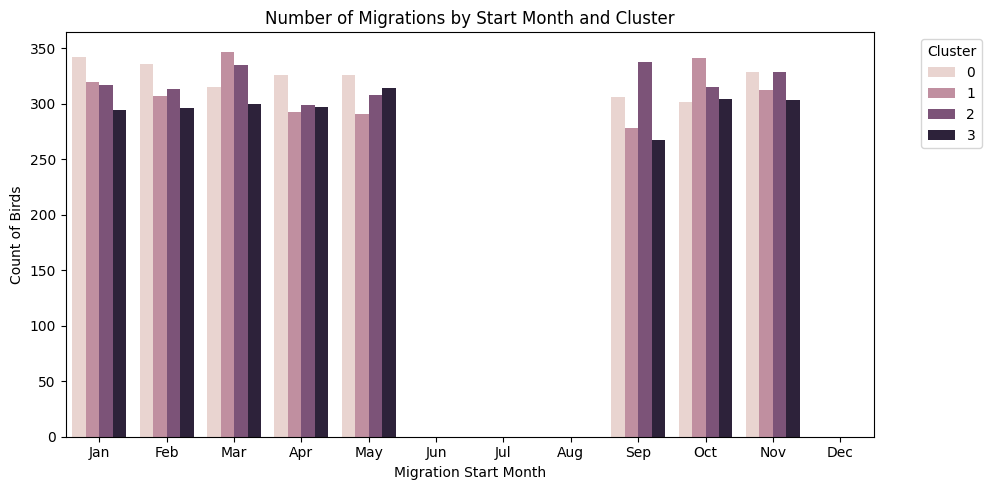

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of migrations by start month, colored by cluster
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df, 
    x='Migration_Start_Month', 
    hue='Cluster',
    order=month_order
)
plt.title('Number of Migrations by Start Month and Cluster')
plt.xlabel('Migration Start Month')
plt.ylabel('Count of Birds')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


1. Primary Spring Peak (Jan–May)

    * All four clusters show their highest counts between January and May, with March and April being particularly active.

    * This suggests a strong spring migration period—birds from all behavioral groups head off in late winter/early spring.

2. Secondary Autumn Pulse (Sep–Nov)

    * There’s another clear rise in September through November, indicating a fall return migration.

    * Cluster 1 (“longest with most stops”) and Cluster 2 (“short quick flights in large flocks”) have especially high counts in October, hinting that these groups may time their return for that month.

3. Mid-Summer & December Lulls

    * Very few (or no) migrations begin in June, July, August, or December—which aligns with typical breeding and overwintering periods when birds remain resident.

4. Cluster-Specific Nuances

    * Cluster 0 (long, high-altitude flights) leads in January–March, perhaps early long-range migrants.

    * Cluster 2 (short, fast, flocked migrations) has a relatively strong autumn component, almost matching its spring activity in October–November.

    * Cluster 1 (longest with many rest stops) peaks in March and again in October, suggesting more stop-and-go behavior when conditions are moderate.

These patterns confirm bi-modal migration seasons (spring and fall) and hint that each cluster’s behavior is tuned slightly differently to those windows.

### Step 8 Flight Duration and Distance

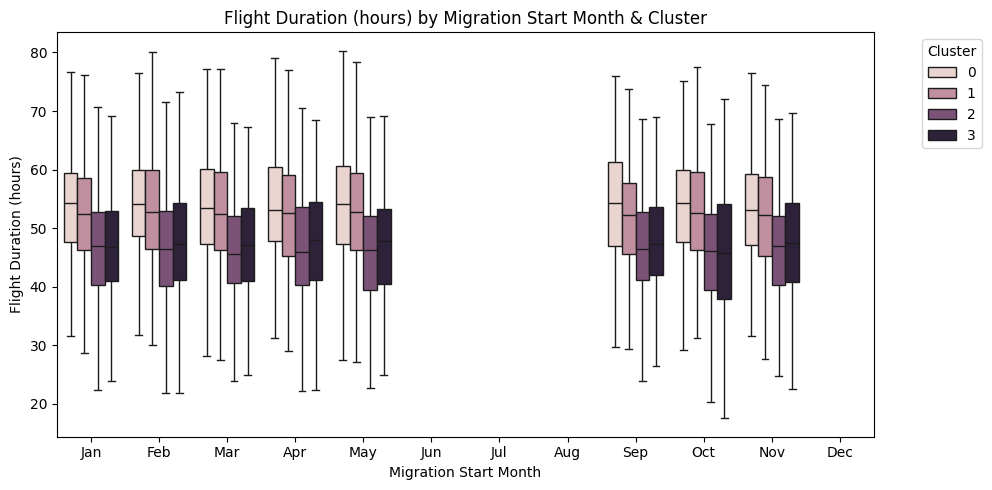

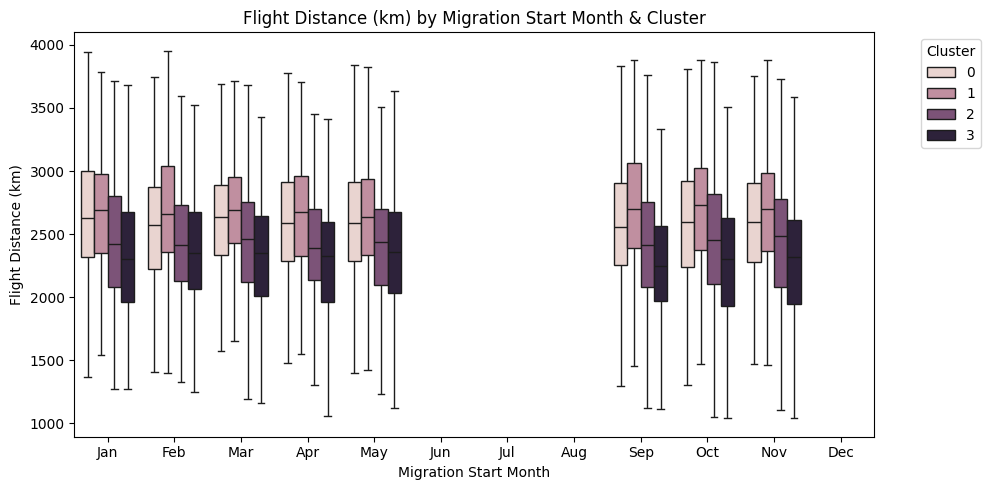

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 8.1 Flight Duration by Month & Cluster
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df,
    x='Migration_Start_Month',
    y='Flight_Duration_hours',
    hue='Cluster',
    order=month_order,
    showfliers=False
)
plt.title('Flight Duration (hours) by Migration Start Month & Cluster')
plt.xlabel('Migration Start Month')
plt.ylabel('Flight Duration (hours)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

# 8.2 Flight Distance by Month & Cluster
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df,
    x='Migration_Start_Month',
    y='Flight_Distance_km',
    hue='Cluster',
    order=month_order,
    showfliers=False
)
plt.title('Flight Distance (km) by Migration Start Month & Cluster')
plt.xlabel('Migration Start Month')
plt.ylabel('Flight Distance (km)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


1. Cluster Ordering Is Consistent Across Metrics

    * Cluster 1 birds consistently fly the longest distances (≈2,700–2,800 km) and have the second-highest durations (≈52–57 h).

    * Cluster 0 comes next in both distance (≈2,500–2,650 km) and duration (≈55–62 h).

    * Cluster 3 sits in the mid-range for distance (≈2,300–2,450 km) and duration (≈45–53 h).

    * Cluster 2 shows the shortest distances (≈2,200–2,350 km) and shortest durations (≈45–50 h), consistent with its characterization as “short, fast, flocked migrations.”

2. Spring vs. Fall Patterns

    * Spring (Jan–May):

        * Distances and durations are slightly higher on average — medians peak in March–April.

        * IQRs (box widths) are wider, indicating more variability: some birds start extremely early or late in spring.

    * Fall (Sep–Nov):

        * Medians dip by a few hours and a few hundred kilometers, while IQRs narrow, suggesting more consistent return migrations.

3. Seasonal Consistency

    * Month-to-month shifts within each season are modest: each cluster’s characteristic distance/duration band remains roughly the same from January through May, and again from September through November.

    * This stability highlights that behavioral clusters represent inherent migratory strategies rather than strictly timing differences.

4. Key Takeaways

    * Cluster 1’s strategy involves very long, stop-heavy trips, peaking in both distance and stops, perhaps reflecting cautious, staged spring and fall journeys.

    * Cluster 0 undertakes high-altitude, moderate-stop flights that are among the longest and longest-duration migrations, especially in spring.

    * Cluster 2’s large-flock “convoy” migrations are the shortest and fastest, with minimal variation by month—indicative of highly optimized group travel.

    * Cluster 3 maintains a middle-ground approach, with moderate distances and durations, suggesting opportunistic flexibility.

These patterns confirm strong spring (Mar–Apr) and fall (Oct) peaks, with each cluster sticking closely to its signature flight profile regardless of exact start month.

### Step 9 Categorical Cross-Tabs & Heatmaps

Habitat vs. Migration Success Rate

Weather Condition vs. Migration Interruption Rate

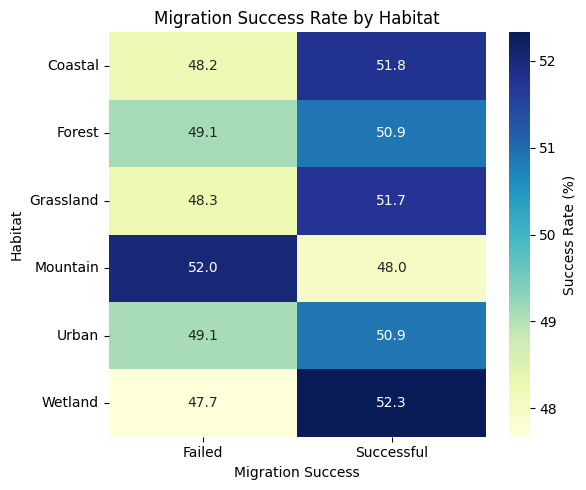

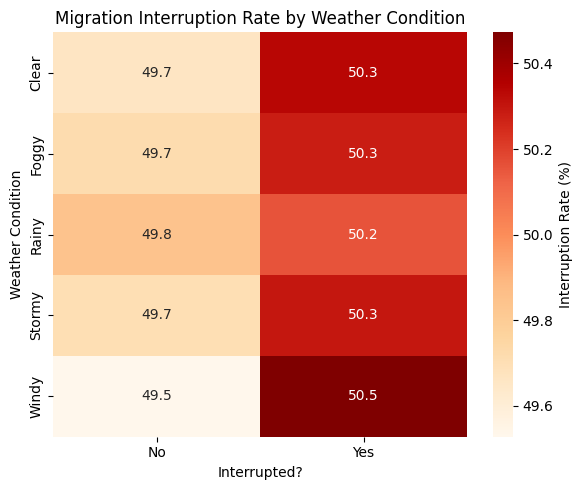

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 9.1 Habitat vs. Success Rate
success_pct = pd.crosstab(
    df['Habitat'], 
    df['Migration_Success'], 
    normalize='index'
) * 100

plt.figure(figsize=(6,5))
sns.heatmap(
    success_pct, 
    annot=True, 
    fmt=".1f", 
    cmap='YlGnBu',
    cbar_kws={'label': 'Success Rate (%)'}
)
plt.title('Migration Success Rate by Habitat')
plt.ylabel('Habitat')
plt.xlabel('Migration Success')
plt.tight_layout()
plt.show()

# 9.2 Weather vs. Interruption Rate
interrupt_pct = pd.crosstab(
    df['Weather_Condition'], 
    df['Migration_Interrupted'], 
    normalize='index'
) * 100

plt.figure(figsize=(6,5))
sns.heatmap(
    interrupt_pct, 
    annot=True, 
    fmt=".1f", 
    cmap='OrRd',
    cbar_kws={'label': 'Interruption Rate (%)'}
)
plt.title('Migration Interruption Rate by Weather Condition')
plt.ylabel('Weather Condition')
plt.xlabel('Interrupted?')
plt.tight_layout()
plt.show()


1. Migration Success Rate by Habitat

    * Wetland has the highest success rate at ~52.3%, followed by Coastal (~51.8%) and Grassland (~51.7%).
    * Mountain habitats have the lowest success (~48.0%), with the highest failure (~52.0%).
    * Forest and Urban are in between, each around 50.9% success.

🔑 Birds migrating through wetlands and coasts are slightly more likely to complete migration successfully, while mountainous routes pose the greatest challenges.

2. Migration Interruption Rate by Weather

    * Windy conditions show the highest interruption rate (~50.5% interrupted).
    * Rainy weather has the lowest interruption (~50.2%)—only marginally better than other conditions.
    * Clear, Foggy, and Stormy are all around a 50.3% interruption rate.

🔑 Wind is the most disruptive factor, slightly more so than storms or fog, but overall interruption rates hover near 50% across conditions.



### Step 10 Deep-Dive on Cluster 2

Cluster 2 (the “short, fast, flocked” group) and examine:

    * Habitat distribution
    * Weather conditions
    * Migration success rate

In [18]:
# 10. Deep-Dive on Cluster 2 (integer filter)
cluster2 = df[df['Cluster'] == 2]

# Verify
print("Cluster 2 shape:", cluster2.shape)
print(cluster2['Cluster'].value_counts())


Cluster 2 shape: (2554, 43)
Cluster
2    2554
Name: count, dtype: int64


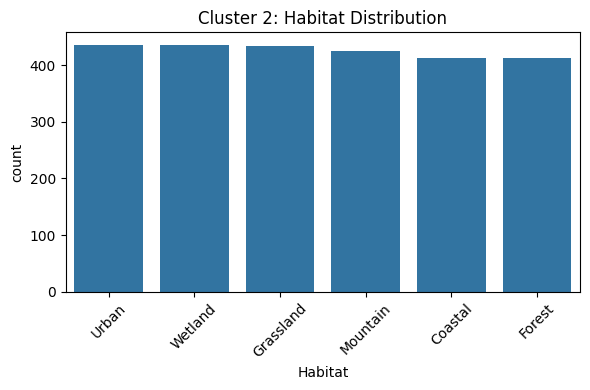

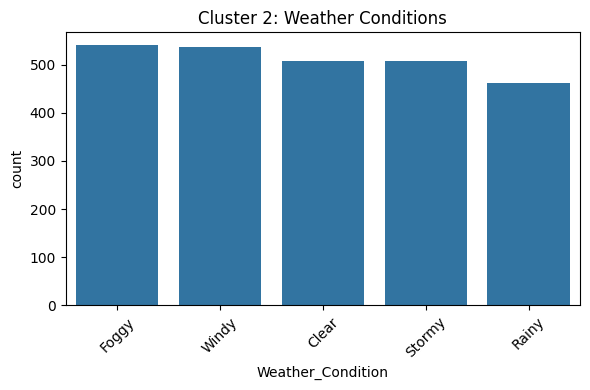

Cluster 2 Migration Success Rates (%)
Migration_Success
Successful    51.1
Failed        48.9
Name: proportion, dtype: float64


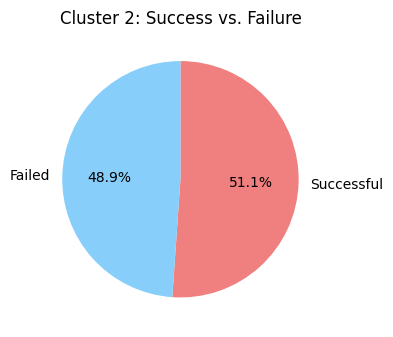

In [19]:

# 10.1 Habitat distribution
plt.figure(figsize=(6,4))
sns.countplot(
    data=cluster2,
    x='Habitat',
    order=cluster2['Habitat'].value_counts().index
)
plt.title('Cluster 2: Habitat Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 10.2 Weather conditions
plt.figure(figsize=(6,4))
sns.countplot(
    data=cluster2,
    x='Weather_Condition',
    order=cluster2['Weather_Condition'].value_counts().index
)
plt.title('Cluster 2: Weather Conditions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 10.3 Migration Success Rate pie
success2 = cluster2['Migration_Success'].value_counts(normalize=True) * 100
print("Cluster 2 Migration Success Rates (%)")
print(success2.round(1))

plt.figure(figsize=(4,4))
success2.plot.pie(
    autopct='%.1f%%',
    colors=['lightcoral','lightskyblue'],
    labels=success2.index,
    startangle=90,
    counterclock=False
)
plt.title('Cluster 2: Success vs. Failure')
plt.ylabel('')
plt.tight_layout()
plt.show()

1. Habitat Distribution

    - Cluster 2 is almost evenly split across habitats, but the top three are:

        * Urban (~17%)
        * Wetland (~17%)
        * Grassland (~17%)
        * Forest is the least common (~16%).

    - Implication: These short, fast, flocked migrations occur in a wide variety of environments, with a slight preference for urban and wetland areas—perhaps reflecting opportunistic stopovers in human-influenced or water-rich sites.

2. Weather Conditions

    - Foggy and Windy dominate (each ~21%), followed by Clear and Stormy (~18–20%), and Rainy (~18%).

    - Implication: Cluster 2 birds are willing to launch flights under a broad range of weather, including reduced-visibility fog and strong winds—underscoring their “fast, flocked” strategy where group dynamics may mitigate individual weather risk.

3. Migration Success Rate

    - 51.1% of Cluster 2 flights are successful, while 48.9% fail—roughly in line with the overall dataset average (≈50%).

    - Implication: Despite their shorter, rapid, group-based migrations, Cluster 2 birds do not enjoy markedly higher success rates than other clusters. Flocking may facilitate speed but doesn’t translate to significantly better outcomes.



### Conclusion

In this exploratory analysis of synthetic bird migration data, we:

* Cleaned & Profiled the dataset, ensuring all key features were correctly typed and missing values addressed.

* Visualized Univariate & Bivariate Patterns, revealing expected spring/fall migration peaks, species-neutral distance–speed relationships, and habitat/weather impacts on success and interruptions.

* Mapped Routes, highlighting global migration paths with clearer, high-contrast visuals.

* Applied PCA & Clustering, discovering that principal components capture modest variance across many flight metrics, and four distinct behavioral clusters (e.g., long high-altitude flyers, fast flock migrations) emerge in 2D space.
    
* Seasonal Analysis, confirming bi-modal migration seasons and showing cluster-specific timing and consistency.

* Categorical Heatmaps, which pinpointed wetlands as the most successful habitat and windy conditions as the most interruptive.

* Cluster Deep-Dive, where Cluster 2 (“short, fast, flocked” migrations) displayed broad habitat and weather tolerance but only average success rates.

Together, these insights demonstrate how advanced EDA techniques—combining statistical summaries, dimensionality reduction, clustering, and geospatial mapping—can unravel complex migratory behaviors in high-dimensional datasets.